## Individual Carbon Emissions
We use a dataset that has been synthetically generated, calculated based on weightings from various studies and sites that currently compute carbon emissions, attempting to maintain values close to reality. This dataset was taken from Kaggle: https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('datasets/carbon_emission.csv')

he set of features is listed in the following code. We concentrate on those that are very relevant to the target 'carbon emission'.

In [3]:
display(df.columns)

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

The different classes for transportation and vehicle type as well as the interval of vehicle distance are shown in the following.

In [4]:
display(df['Transport'].unique())
display(df['Vehicle Type'].unique())
display([df['Vehicle Monthly Distance Km'].min(), df['Vehicle Monthly Distance Km'].max()])

array(['public', 'walk/bicycle', 'private'], dtype=object)

array([nan, 'petrol', 'diesel', 'hybrid', 'lpg', 'electric'], dtype=object)

[0, 9999]

### Transport type and carbon emission

In [5]:
display(df[['Transport', 'CarbonEmission']].dropna().sample(5))

,Transport,CarbonEmission
1157,walk/bicycle,3346
5390,private,1566
8273,walk/bicycle,2413
389,public,1994
6094,walk/bicycle,1260


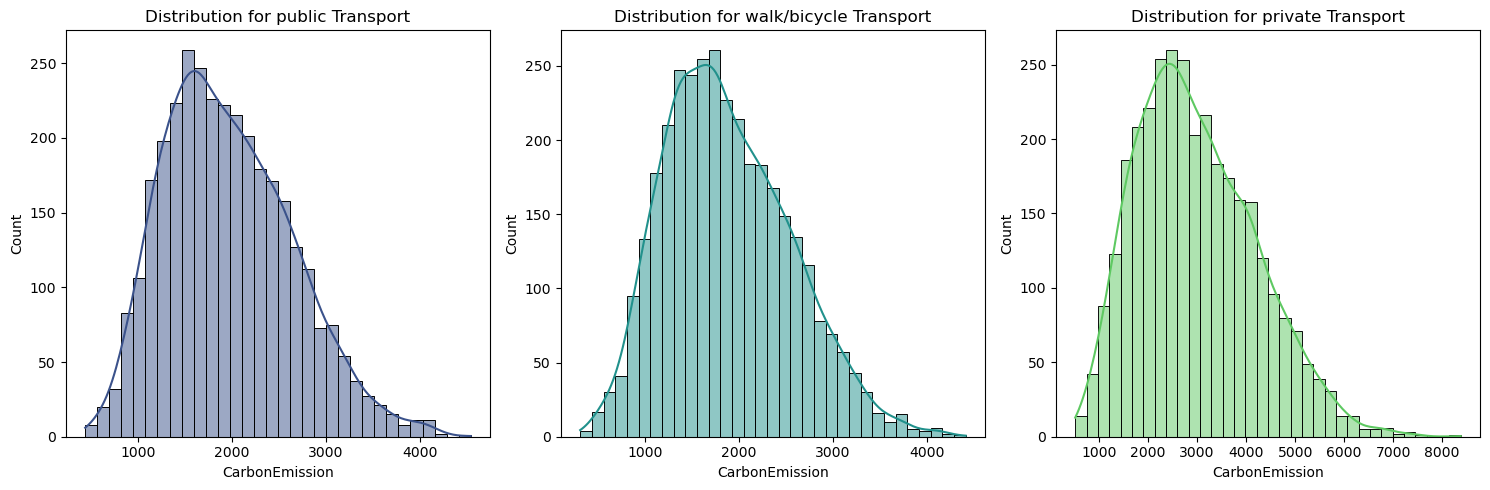

In [9]:
unique_Transport = df['Transport'].unique()
palette = sns.color_palette("viridis", len(unique_Transport))

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
for i, transport in enumerate(unique_Transport):
    ax = axes[i]
    activity_df = df[df['Transport'] == transport]
    sns.histplot(data=activity_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {transport} Transport")

plt.tight_layout()
plt.show()

### Vehicle type and carbon emission

In [10]:
display(df[['Vehicle Type', 'CarbonEmission']].dropna().sample(5))

,Vehicle Type,CarbonEmission
440,petrol,3973
7957,petrol,4473
7883,lpg,2908
4432,hybrid,2192
2458,hybrid,1804


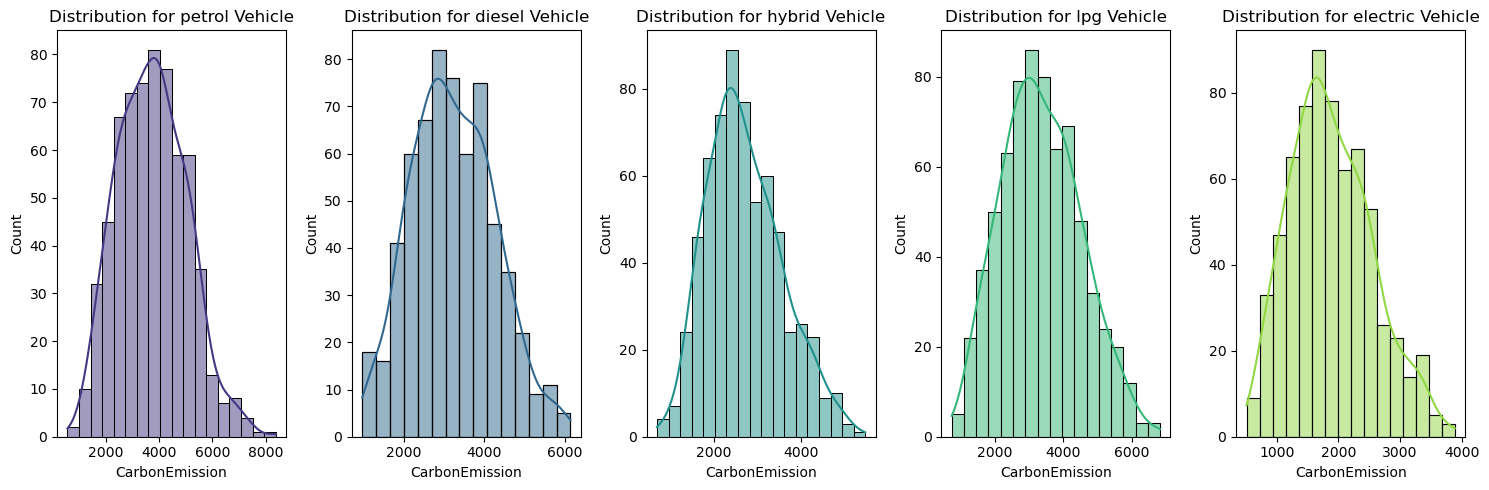

In [12]:
unique_Vehicle_Type = df['Vehicle Type'].dropna().unique()
palette = sns.color_palette("viridis", len(unique_Vehicle_Type))

fig, axes = plt.subplots(1, 5, figsize=(15, 5)) 
for i, type in enumerate(unique_Vehicle_Type):
    ax = axes[i]
    activity_df = df[df['Vehicle Type'] == type]
    sns.histplot(data=activity_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {type} Vehicle")

plt.tight_layout()
plt.show()

### Vehicle monthly distance and carbon emission

In [13]:
display(df[['Vehicle Monthly Distance Km', 'CarbonEmission']].dropna().sample(5))

,Vehicle Monthly Distance Km,CarbonEmission
9218,34,1539
9709,95,1335
7714,1952,1881
9134,1558,3264
4202,1786,1897


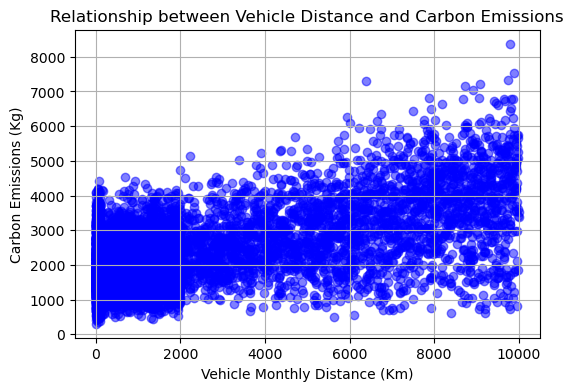

In [15]:
# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['Vehicle Monthly Distance Km'], df['CarbonEmission'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Relationship between Vehicle Distance and Carbon Emissions')
plt.xlabel('Vehicle Monthly Distance (Km)')
plt.ylabel('Carbon Emissions (Kg)')

# Display the plot
plt.grid(True)
plt.show()